<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">


# Web Scraping for Indeed.com and Predicting Salaries

In this project, we will practice two major skills: collecting data by scraping a website and then building a binary predictor with Logistic Regression.

We are going to collect salary information on data science jobs in a variety of markets. Then using the location, title and summary of the job we will attempt to predict the salary of the job. For job posting sites, this would be extraordinarily useful. While most listings DO NOT come with salary information (as you will see in this exercise), being able to extrapolate or predict the expected salaries from other listings can help guide negotiations.

Normally, we could use regression for this task; however, we will convert this problem into classification and use Logistic Regression or any other suitable classifier.

- Question: Why would we want this to be a classification problem?
- Answer: While more precision may be better, there is a fair amount of natural variance in job salaries - predicting a range may be useful.

Therefore, the first part of the assignment will be focused on scraping Indeed.com. In the second, we'll focus on using listings with salary information to build a model and predict additional salaries.

### Scraping job listings from Indeed.com

We will be scraping job listings from Indeed.com using BeautifulSoup. Luckily, Indeed.com is a simple text page where we can easily find relevant entries.

First, look at the source of an Indeed.com page: (http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10").

Notice, each job listing is underneath a `div` tag with a class name of `result`. We can use BeautifulSoup to extract those. 

#### Setup a request (using `requests`) to the URL below. Use BeautifulSoup to parse the page and extract all results (HINT: Look for div tags with class name result)

The URL here has many query parameters:

- `q` for the job search
- This is followed by "+20,000" to return results with salaries (or expected salaries >$20,000)
- `l` for a location 
- `start` for what result number to start on

In [3]:
URL = "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10"


In [1]:
import requests
import bs4
from bs4 import BeautifulSoup

In [6]:
r = requests.get(URL)

In [7]:
print(r.text[0:500])  

<!DOCTYPE html>
<html lang="en" dir="ltr">
<head>
<meta http-equiv="content-type" content="text/html;charset=UTF-8">
<script type="text/javascript" src="/s/adcd57e/en_US.js"></script>
<link href="/s/2320f52/jobsearch_all.css" rel="stylesheet" type="text/css">
<link rel="alternate" type="application/rss+xml" title="Data Scientist $20,000 Jobs, Employment in New York State" href="http://rss.indeed.com/rss?q=data+scientist+%2420%2C000&l=New+York">
<link rel="alternate" media="only screen and (max-w


In [8]:
soup = BeautifulSoup(r.text,'html.parser')
print(soup.prettify())
    


<!DOCTYPE html>
<html dir="ltr" lang="en">
 <head>
  <meta content="text/html;charset=utf-8" http-equiv="content-type"/>
  <script src="/s/adcd57e/en_US.js" type="text/javascript">
  </script>
  <link href="/s/2320f52/jobsearch_all.css" rel="stylesheet" type="text/css"/>
  <link href="http://rss.indeed.com/rss?q=data+scientist+%2420%2C000&amp;l=New+York" rel="alternate" title="Data Scientist $20,000 Jobs, Employment in New York State" type="application/rss+xml"/>
  <link href="/m/jobs?q=data+scientist+%2420%2C000&amp;l=New+York" media="only screen and (max-width: 640px)" rel="alternate"/>
  <link href="/m/jobs?q=data+scientist+%2420%2C000&amp;l=New+York" media="handheld" rel="alternate"/>
  <script type="text/javascript">
   if (typeof window['closureReadyCallbacks'] == 'undefined') {
        window['closureReadyCallbacks'] = [];
    }

    function call_when_jsall_loaded(cb) {
        if (window['closureReady']) {
            cb();
        } else {
            window['closureReadyCall

Let's look at one result more closely. A single `result` looks like

```
<div class=" row result" data-jk="2480d203f7e97210" data-tn-component="organicJob" id="p_2480d203f7e97210" itemscope="" itemtype="http://schema.org/JobPosting">
<h2 class="jobtitle" id="jl_2480d203f7e97210">
<a class="turnstileLink" data-tn-element="jobTitle" onmousedown="return rclk(this,jobmap[0],1);" rel="nofollow" target="_blank" title="AVP/Quantitative Analyst">AVP/Quantitative Analyst</a>
</h2>
<span class="company" itemprop="hiringOrganization" itemtype="http://schema.org/Organization">
<span itemprop="name">
<a href="/cmp/Alliancebernstein?from=SERP&amp;campaignid=serp-linkcompanyname&amp;fromjk=2480d203f7e97210&amp;jcid=b374f2a780e04789" target="_blank">
    AllianceBernstein</a></span>
</span>
<tr>
<td class="snip">
<nobr>$117,500 - $127,500 a year</nobr>
<div>
<span class="summary" itemprop="description">
C onduct quantitative and statistical research as well as portfolio management for various investment portfolios. Collaborate with Quantitative Analysts and</span>
</div>
</div>
</td>
</tr>
</table>
</div>
```

While this has some more verbose elements removed, we can see that there is some structure to the above:
- The salary is available in a `nobr` element inside of a `td` element with `class='snip'`.
- The title of a job is in a link with class set to `jobtitle` and a `data-tn-element='jobTitle'`.  
- The location is set in a `span` with `class='location'`. 
- The company is set in a `span` with `class='company'`. 

### Write 4 functions to extract each item: location, company, job, and salary.

Example: 
```python
def extract_location_from_result(result):
    return result.find ...
```


- **Make sure these functions are robust and can handle cases where the data/field may not be available.**
    - Remember to check if a field is empty or `None` for attempting to call methods on it.
    - Remember to use `try/except` if you anticipate errors.
- **Test** the functions on the results above and simple examples.

In [9]:
jobs = soup.find_all(name='div', attrs={'class':'row result'})

In [10]:
def extract_title(job): 
    try:
        title = job.find(name ='a', attrs={'jobtitle':'data-tn-element'}).text
             
    except:
        title = 'not_found'
    return title


    

In [11]:
def extract_salary(job):
    try:
        
        salary = job.find('span',attrs={'class':'no-wrap'}).text
    
    except:
        salary= 'not_found'
    return salary

In [12]:
def extract_location(job):
    try:
        location = job.find('span',attrs={'class':'location'}).text
        
    except:
        location = 'not_found'
    return location    

In [13]:
def extract_company(job):
    try:
        company = job.find('a',attrs={'target':'_blank','rel':'noopener'}).text
    except:
        
        company = 'not_found'
        
    return company    
            

Now, to scale up our scraping, we need to accumulate more results. We can do this by examining the URL above.

- "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10"

There are two query parameters here we can alter to collect more results, the `l=New+York` and the `start=10`. The first controls the location of the results (so we can try a different city). The second controls where in the results to start and gives 10 results (thus, we can keep incrementing by 10 to go further in the list).

#### Complete the following code to collect results from multiple cities and starting points. 
- Enter your city below to add it to the search.
- Remember to convert your salary to U.S. Dollars to match the other cities if the currency is different.

In [15]:
YOUR_CITY = 'Miami'

In [ ]:
max_results_per_city = 100
city_set = [‘New+York’,’Chicago’,’San+Francisco’, ‘Austin’, ‘Seattle’, ‘Los+Angeles’, ‘Philadelphia’, ‘Atlanta’, ‘Dallas’, ‘Pittsburgh’, ‘Portland’, ‘Phoenix’, ‘Denver’, ‘Houston’, ‘Miami’, ‘Washington+DC’, ‘Boulder’]
columns = [“city”, “job_title”, ”company_name”, ”location”, ”summary”, ”salary”]
sample_df = pd.DataFrame(columns = columns)

In [ ]:
url_template = "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l={}&start={}"
max_results_per_city = 1000 # Set this to a high-value (5000) to generate more results. 
# Crawling more results, will also take much longer. First test your code on a small number of results and then expand.

results = []

cities = []
titles = []
salaries =[]
companies = []
locations =[]
failed=[]

for city in set(['New+York', 'Chicago', 'San+Francisco', 'Austin', 'Seattle', 
    'Los+Angeles', 'Philadelphia', 'Atlanta', 'Dallas', 'Pittsburgh', 
    'Portland', 'Phoenix', 'Denver', 'Houston', 'Miami']):
    
    for start in range(0, max_results_per_city, 10):
        url = f"http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l={city}&start={start}"
        try:
            r=requests.get(url)
            soup = BeautifulSoup(r.text,'html_parser')
            jobs = soup.find_all(name='div', attrs={'class':'row result'})
            for job in jobs:
                titles.append(extract_title(job))
                salaries.append(extract_salary(job))
                companies.append(extract_company(job))
                locations.apend(extract_location(job))
                cities.append(city)
        except:
            failed.append(url)

               

#### Use the functions you wrote above to parse out the 4 fields - location, title, company and salary. Create a dataframe from the results with those 4 columns.

In [ ]:
max_results_per_city = 100
city_set = [‘New+York’,’Chicago’,’San+Francisco’, ‘Austin’, ‘Seattle’, ‘Los+Angeles’, ‘Philadelphia’, ‘Atlanta’, ‘Dallas’, ‘Pittsburgh’, ‘Portland’, ‘Phoenix’, ‘Denver’, ‘Houston’, ‘Miami’, ‘Washington+DC’, ‘Boulder’]
columns = ['location', 'title', 'salary', 'company']
job_df = pd.DataFrame(columns = columns)

Lastly, we need to clean up salary data. 

1. Only a small number of the scraped results have salary information - only these will be used for modeling.
1. Some of the salaries are not yearly but hourly or weekly, these will not be useful to us for now.
1. Some of the entries may be duplicated.
1. The salaries are given as text and usually with ranges.

#### Find the entries with annual salary entries, by filtering the entries without salaries or salaries that are not yearly (filter those that refer to hour or week). Also, remove duplicate entries.

#### Write a function that takes a salary string and converts it to a number, averaging a salary range if necessary.

In [9]:
## YOUR CODE HERE

### Save your results as a CSV

In [10]:
## YOUR CODE HERE

## QUESTION 2: Factors that distinguish job category

Using the job postings you scraped for part 1 (or potentially new job postings from a second round of scraping), identify features in the data related to job postings that can distinguish job titles from each other. There are a variety of interesting ways you can frame the target variable, for example:
- What components of a job posting distinguish data scientists from other data jobs?
- What features are important for distinguishing junior vs. senior positions?
- Do the requirements for titles vary significantly with industry (e.g. healthcare vs. government)?

You may end up making multiple classification models to tackle different questions. Be sure to clearly explain your hypotheses and framing, any feature engineering, and what your target variables are. The type of classification model you choose is up to you. Be sure to interpret your results and evaluate your model's performance.

#### Load in the the data of scraped salaries

In [ ]:
#Possible hypotheses considered:

#Hypothesis_1: high salaries in Data Science are not dependent on location e.g. New York vs Denver
#Hypothesis_2: Jobs with the word 'government' in the title have lower salaries
#Hypothesis_3: Jobs with 'Data Science' in the title command higher salaries
#It would be great to model all of these. Time allowing. 
#I will start with Hypothesis_1
#Begin by cleaning up salary column and deciding on what defines a high salary

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('all_scrapes.csv')
df

,Unnamed: 0,city,company,location,salary,title
0,0,Philadelphia,Defined Clarity,"Philadelphia, PA 19123 (Poplar-Ludlow-Yorktown...",$65 - $75 an hour,Data Analyst / Data Scientist
1,1,Philadelphia,Children's Hospital of Philadelphia,"Philadelphia, PA 19146 (Point Breeze area)",No Salary,Data Scientist I
2,2,Philadelphia,Children's Hospital of Philadelphia,"Philadelphia, PA 19146 (Point Breeze area)",No Salary,Supv DBHi Data Scientist
3,3,Philadelphia,Federal Reserve Bank of Philadelphia,"Philadelphia, PA",No Salary,Real Time Data Research Analyst
4,4,Philadelphia,"Pavone Marketing Group, Inc.","Philadelphia, PA 19136 (Mayfield area)",No Salary,Data Analyst
5,5,Philadelphia,Drexel University,"Philadelphia, PA",No Salary,Data Analyst
6,6,Philadelphia,Lockheed Martin,"King of Prussia, PA 19406",No Salary,Data Scientist Analyst Staff
7,7,Philadelphia,Comcast,"Philadelphia, PA 19103 (Belmont area)",No Salary,"Scientist 4, Entrprs Data & Anlytcs 1470"
8,8,Philadelphia,CSL Behring,"King of Prussia, PA",No Salary,Statistical Scientist
9,9,Philadelphia,Drexel University,"Philadelphia, PA",No Salary,Research Scientist


#### We want to predict a binary variable - whether the salary was low or high. Compute the median salary and create a new binary variable that is true when the salary is high (above the median).

We could also perform Linear Regression (or any regression) to predict the salary value here. Instead, we are going to convert this into a _binary_ classification problem, by predicting two classes, HIGH vs LOW salary.

While performing regression may be better, performing classification may help remove some of the noise of the extreme salaries. We don't have to choose the `median` as the splitting point - we could also split on the 75th percentile or any other reasonable breaking point.

In fact, the ideal scenario may be to predict many levels of salaries.

In [ ]:
#The salary column is very messy at the moment. 
#Drop null values and get rid of $, (),commas and words
#convert strings to floats
#convert hourly, weekly, monthly into annual salaries


In [4]:
df.shape

(5375, 6)

In [5]:
df.salary.describe()

count          5375
unique          348
top       No Salary
freq           4873
Name: salary, dtype: object

In [6]:
df_salary = df[df.salary != 'No Salary']
df_salary

,Unnamed: 0,city,company,location,salary,title
0,0,Philadelphia,Defined Clarity,"Philadelphia, PA 19123 (Poplar-Ludlow-Yorktown...",$65 - $75 an hour,Data Analyst / Data Scientist
70,85,Philadelphia,Workbridge Associates,"Philadelphia, PA","$95,000 - $120,000 a year",Data Scientist (statistical modeling with insu...
84,99,Philadelphia,Workbridge Associates,"Mount Laurel, NJ","$100,000 - $130,000 a year",Python Developer/Data Scientist
89,108,Philadelphia,Workbridge Associates,"Wilmington, DE","$85,000 - $110,000 a year",Data Scientist (Statistical Modeling)
90,114,Philadelphia,Workbridge Associates,"Wilmington, DE","$90,000 - $100,000 a year","Data Scientist (Hadoop, SAS, R, Python)"
91,115,Philadelphia,City of Philadelphia,"Philadelphia, PA","$36,486 - $46,907 a year",Police Forensic Science Technician
97,121,Philadelphia,3coast,"Philadelphia, PA","$150,000 - $250,000 a year",Quant Research Analyst
124,148,Philadelphia,3coast,"Philadelphia, PA","$85,000 - $115,000 a year",Data Scientist
125,149,Philadelphia,Jobspring Partners,"Bryn Mawr, PA","$100,000 - $120,000 a year",IT Manager
296,401,Philadelphia,Life.io,"Philadelphia, PA","$125,000 a year",SVP of Technology and Product


#### Thought experiment: What is the baseline accuracy for this model?

In [275]:
#looking for duplicate entries
df_salary.salary.duplicated().sum()

155

In [276]:
df_salary.shape

(502, 6)

In [277]:

M= df_salary.drop_duplicates('salary')

In [278]:

M.shape

(347, 6)

In [321]:
y =M.salary.apply(lambda x: x.replace('$',''))
y.shape

(347,)

In [322]:
Z= y.apply(lambda x: x.replace('a year', ''))
Z.shape

(347,)

In [323]:
T= Z.apply(lambda x: x.replace('Indeed est.', ''))

In [324]:
R = T.apply(lambda x: x.replace('an hour', ''))

In [325]:
S =R.apply(lambda x: x.replace('a month', ''))

In [326]:
Q = S.apply(lambda x: x.replace('()', ''))

In [327]:

Q.head(2)

0              65 - 75 
70    95,000 - 120,000 
Name: salary, dtype: object

In [328]:
N = pd.DataFrame(Q)
N.head(2)

,salary
0,65 - 75
70,"95,000 - 120,000"


In [329]:
N_split =N['salary'].str.split('-', 1, expand=True)
N_split.head(2)

,0,1
0,65,75
70,"95,000","120,000"


In [330]:

N_split1 =N_split.rename(index=str, columns={0: "salary1", 1: "salary2"})
N_split1.head()

,salary1,salary2
0,65,75
70,"95,000","120,000"
84,"100,000","130,000"
89,"85,000","110,000"
90,"90,000","100,000"


In [331]:
#need to make the salaries integers or floats
N_split1.salary1.dtypes

dtype('O')

In [332]:
N_split1['salary1'] = (N_split1['salary1'].str.replace(',','').astype(float))


In [333]:
N_split1['salary2'] = (N_split1['salary2'].str.replace(',','').astype(float))

In [336]:
N_split1.head(2)

,salary1,salary2
0,65.0,75.0
70,95000.0,120000.0


In [337]:
N_split1.salary1.dtypes
N_split1.salary2.dtypes

dtype('float64')

In [350]:
#make one column by finding themean of the two columns
filtered_data1 = filtered_data['salaries'] = (filtered_data['salary1'] + filtered_data['salary2'])


In [351]:
filtered_data1 = filtered_data1/2

In [352]:
filtered_data1 =pd.DataFrame(filtered_data1)
filtered_data1.head(2)

,0
0,70.0
70,107500.0


In [353]:
filtered_data1 =filtered_data1.rename(index=str, columns={0: 'salaries'})

In [354]:
filtered_data1.head(2)

,salaries
0,70.0
70,107500.0


In [355]:
filtered_data1.shape

(347, 1)

In [356]:
filtered_data1.salaries.dtype

dtype('float64')

In [357]:
M.reset_index(drop=True, inplace=True)
filtered_data1.reset_index(drop=True, inplace=True)

In [360]:
df_new =pd.concat([M, filtered_data1], axis=1)
df_new.head(2)

,Unnamed: 0,city,company,location,salary,title,salaries
0,0,Philadelphia,Defined Clarity,"Philadelphia, PA 19123 (Poplar-Ludlow-Yorktown...",$65 - $75 an hour,Data Analyst / Data Scientist,70.0
1,85,Philadelphia,Workbridge Associates,"Philadelphia, PA","$95,000 - $120,000 a year",Data Scientist (statistical modeling with insu...,107500.0


In [366]:
#drop salary column
df_new.drop(['salary'], axis=1, inplace = True)


In [367]:
df_new.head(2)

,Unnamed: 0,city,company,location,title,salaries
0,0,Philadelphia,Defined Clarity,"Philadelphia, PA 19123 (Poplar-Ludlow-Yorktown...",Data Analyst / Data Scientist,70.0
1,85,Philadelphia,Workbridge Associates,"Philadelphia, PA",Data Scientist (statistical modeling with insu...,107500.0


In [368]:
#filter out the 'week' salary as they do not multiply up rationally necessarily to annual salary

df_new_filt = df_new[df_new.salaries > 500 ]

In [369]:
df_new_filt.shape

(270, 6)

In [401]:

# monthly salaries are below 12,000. Multiply all salaries below 12,000 to get annual conversion
df_new_salaries = df_new_filt['salaries'].map(lambda x: x*12 if x < 12000 else x)

In [377]:
# this will be used later in our classification model
df_new_salaries.head()

1    107500.0
2    115000.0
3     97500.0
4     95000.0
5     41696.5
Name: salaries, dtype: float64

In [402]:
df_new_salaries.shape

(270,)

In [433]:
type(df_new_salaries)

pandas.core.series.Series

In [403]:
#salaries are now ready to work with
# read off average salaries from describe. Median is at 50%

df_new_salaries.describe()


count       270.000000
mean     105711.153704
std       39416.618529
min       32945.000000
25%       73375.000000
50%      104750.000000
75%      135000.000000
max      250000.000000
Name: salaries, dtype: float64

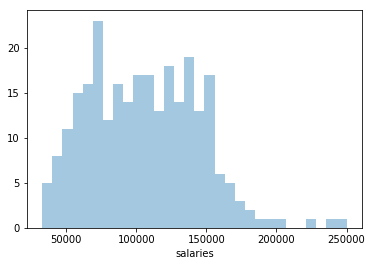

In [404]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.distplot(df_new_salaries, bins=30, kde=False);

plt.show()
#distribution is not particularly skewed

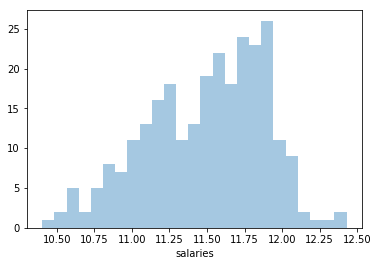

In [405]:
#natural log of salaries does not offer a particularly normal distribution and seems more skewed than our pre log 
#data
#use non logged data for modelling

log_salaries = np.log(df_new_salaries)
sns.distplot(log_salaries, kde=False, bins=25)

plt.show()

### Create a classification model to predict High/Low salary. 


#### Model based on location:

- Start by ONLY using the location as a feature. 
- Use logistic regression with both statsmodels and sklearn.
- Use a further classifier you find suitable.
- Remember that scaling your features might be necessary.
- Display the coefficients/feature importances and write a short summary of what they mean.

#### Model taking into account job levels and categories:

- Create a few new variables in your dataframe to represent interesting features of a job title.
- For example, create a feature that represents whether 'Senior' is in the title or whether 'Manager' is in the title. 
- Incorporate other text features from the title or summary that you believe will predict the salary.
- Then build new classification models including also those features. Do they add any value? 
- Tune your models by testing parameter ranges, regularization strengths, etc. Discuss how that affects your models. 
- Discuss model coefficients or feature importances as applicable.

#### Model evaluation:

Your boss would rather tell a client incorrectly that they would get a lower salary job than tell a client incorrectly that they would get a high salary job. Adjust one of your models to ease his mind, and explain what it is doing and any tradeoffs. 


- Use cross-validation to evaluate your models. 
- Evaluate the accuracy, AUC, precision and recall of the models. 
- Plot the ROC and precision-recall curves for at least one of your models.

#### Bonus:

- Answer the salary discussion by using your model to explain the tradeoffs between detecting high vs low salary positions. 
- Discuss the differences and explain when you want a high-recall or a high-precision model in this scenario.
- Obtain the ROC/precision-recall curves for the different models you studied (at least the tuned model of each category) and compare.

In [ ]:
# checking out our salary data the mean and median are around $105,000
# let's initially look at a binary split at just above the median

In [393]:
# code up the target binary class variable
high = df_new_salaries.map(lambda x: 1 if x > 109000 else 0)
high.value_counts(dropna=False)
#split looks reasonable weightings so let us model here

0    145
1    125
Name: salaries, dtype: int64

In [454]:
#calculate chance of guessing whether high salary is chosen
baseline_acc = 1. - high.mean()
baseline_acc

0.537037037037037

In [408]:
#investigating hyptothesis one regarding location and salary. Feature matrix let's take 'city' as 'location' messy
df_new_filt.city.dtypes


dtype('O')

In [407]:
df_new_filt.city.isnull().sum()

0

In [409]:
df_city = pd.DataFrame(df_new_filt.city)
df_city.head()

,city
1,Philadelphia
2,Philadelphia
3,Philadelphia
4,Philadelphia
5,Philadelphia


In [466]:
df_city.shape


(270, 1)

/Users/carolinekeddie/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


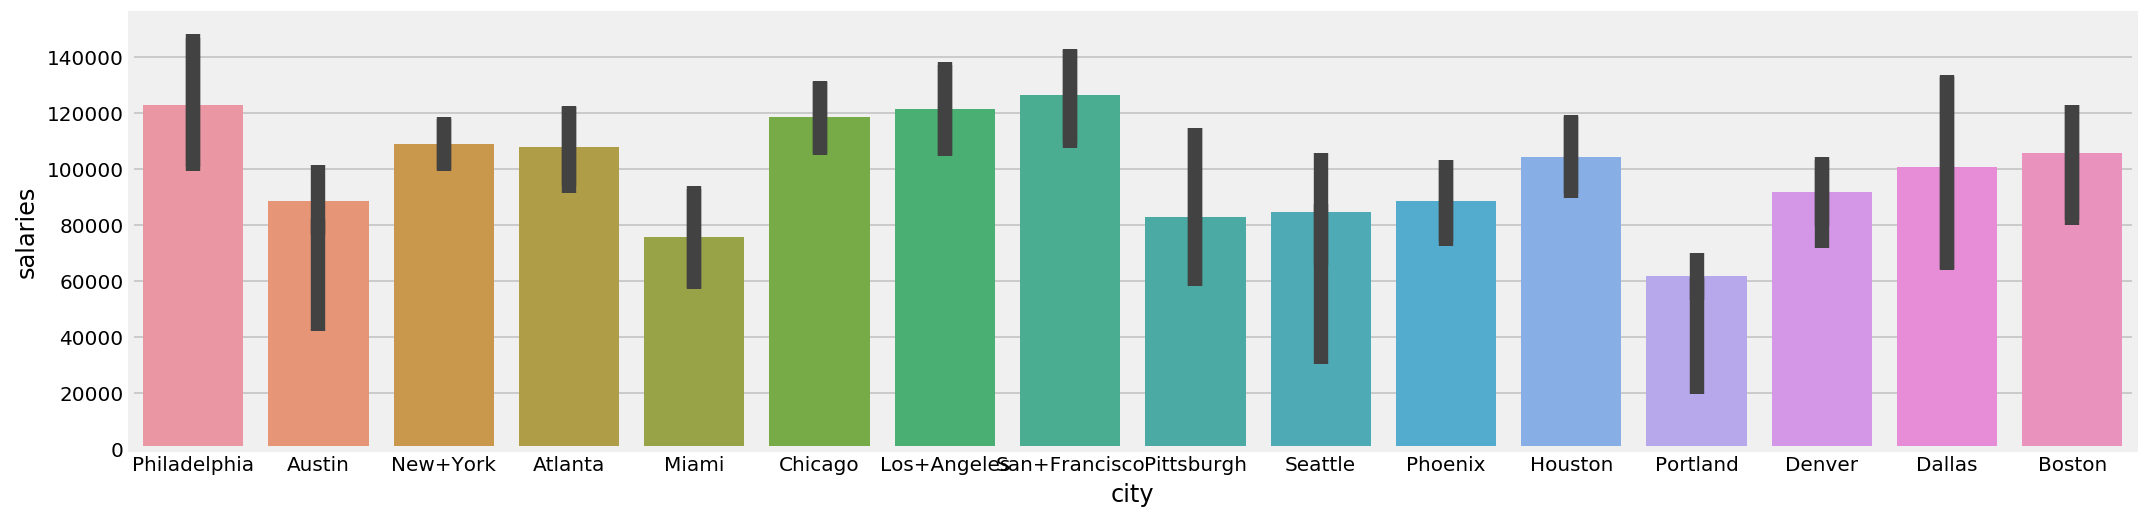

In [472]:
plt.figure(figsize=(16,4)) 
sns.barplot(df_new_filt.city,df_new_salaries);
ax = sns.barplot(x='city', y="salaries", data=df_new_filt)
#we have so little data we can analyse it in a barplot
#can our models predict high salaries over and above our baseline prediction

In [436]:
#dummify city data
city_dummy = pd.get_dummies(df_city,columns=['city'])
city_dummy.head(2)

,city_Atlanta,city_Austin,city_Boston,city_Chicago,city_Dallas,city_Denver,city_Houston,city_Los+Angeles,city_Miami,city_New+York,city_Philadelphia,city_Phoenix,city_Pittsburgh,city_Portland,city_San+Francisco,city_Seattle
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [437]:
from sklearn import datasets, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [452]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [438]:
# specify predictor matrix and target variable
X = city_dummy
y = high

In [439]:
#no need to scale our predictor matrix
#set up train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y,
                  test_size=0.3,random_state=1)

In [440]:
# import logistic regression and gridsearch
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

In [444]:
def fitter(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    print(model.score(X_train, y_train))
    print(model.score(X_test, y_test))
    print()
    print(confusion_matrix(y_test, model.predict(X_test)))
    print()
    print(classification_report(y_test, model.predict(X_test)))

In [442]:
# choose and inspect the model

model = LogisticRegression()
list(model.get_params().keys())

['C',
 'class_weight',
 'dual',
 'fit_intercept',
 'intercept_scaling',
 'max_iter',
 'multi_class',
 'n_jobs',
 'penalty',
 'random_state',
 'solver',
 'tol',
 'verbose',
 'warm_start']

In [443]:
params = {'C':np.logspace(-4,4,10),
          'penalty':['l1','l2'],
          'fit_intercept':[True,False]}

gs = GridSearchCV(estimator=model,
                  param_grid=params,
                  cv=5,
                  scoring='accuracy',
                  return_train_score=True)

gs.fit(X_train,y_train)

# extract the grid search results

print('Best Parameters:')
print(gs.best_params_)
print('Best estimator C:')
print(gs.best_estimator_.C)
print('Best estimator mean cross validated training score:')
print(gs.best_score_)
print('Best estimator score on the full training set:')
print(gs.score(X_train,y_train))
print('Best estimator score on the test set:')
print(gs.score(X_test,y_test))
print('Best estimator coefficients:')
print(gs.best_estimator_.coef_)

Best Parameters:
{'C': 0.0001, 'fit_intercept': False, 'penalty': 'l2'}
Best estimator C:
0.0001
Best estimator mean cross validated training score:
0.645502645503
Best estimator score on the full training set:
0.661375661376
Best estimator score on the test set:
0.592592592593
Best estimator coefficients:
[[  9.99799707e-05  -1.99939974e-04   4.99962253e-05   2.99880009e-04
   -9.99899546e-05  -2.49906247e-04  -4.99887374e-05   1.99929990e-04
   -1.49988676e-04  -4.49381968e-04   2.49931207e-04  -9.99949466e-05
   -9.99949466e-05  -1.49988676e-04   3.99760140e-04  -1.99959941e-04]]


In [445]:
model = LogisticRegression()

fitter(model, X_train, y_train, X_test, y_test)

0.661375661376
0.592592592593

[[37  9]
 [24 11]]

             precision    recall  f1-score   support

          0       0.61      0.80      0.69        46
          1       0.55      0.31      0.40        35

avg / total       0.58      0.59      0.57        81



In [ ]:
#looking at our confusion matrix above our accuracy at 59% on the test set is not much better than baseline for
#predicting high salaries
#OUR DATA SET IS VERY SMALL! WE ENDED UP WITH ONLY 270 CLEAN SALARIES TO MODEL WITH. NEED TO SCRAPE&CLEAN MORE DATA
#FOR A MORE RELIABLE PREDICTOR
#WE COULD ALSO LOWER ARE THRESHOLD OF $109,000 FOR PREDICTING A HIGH SALARY

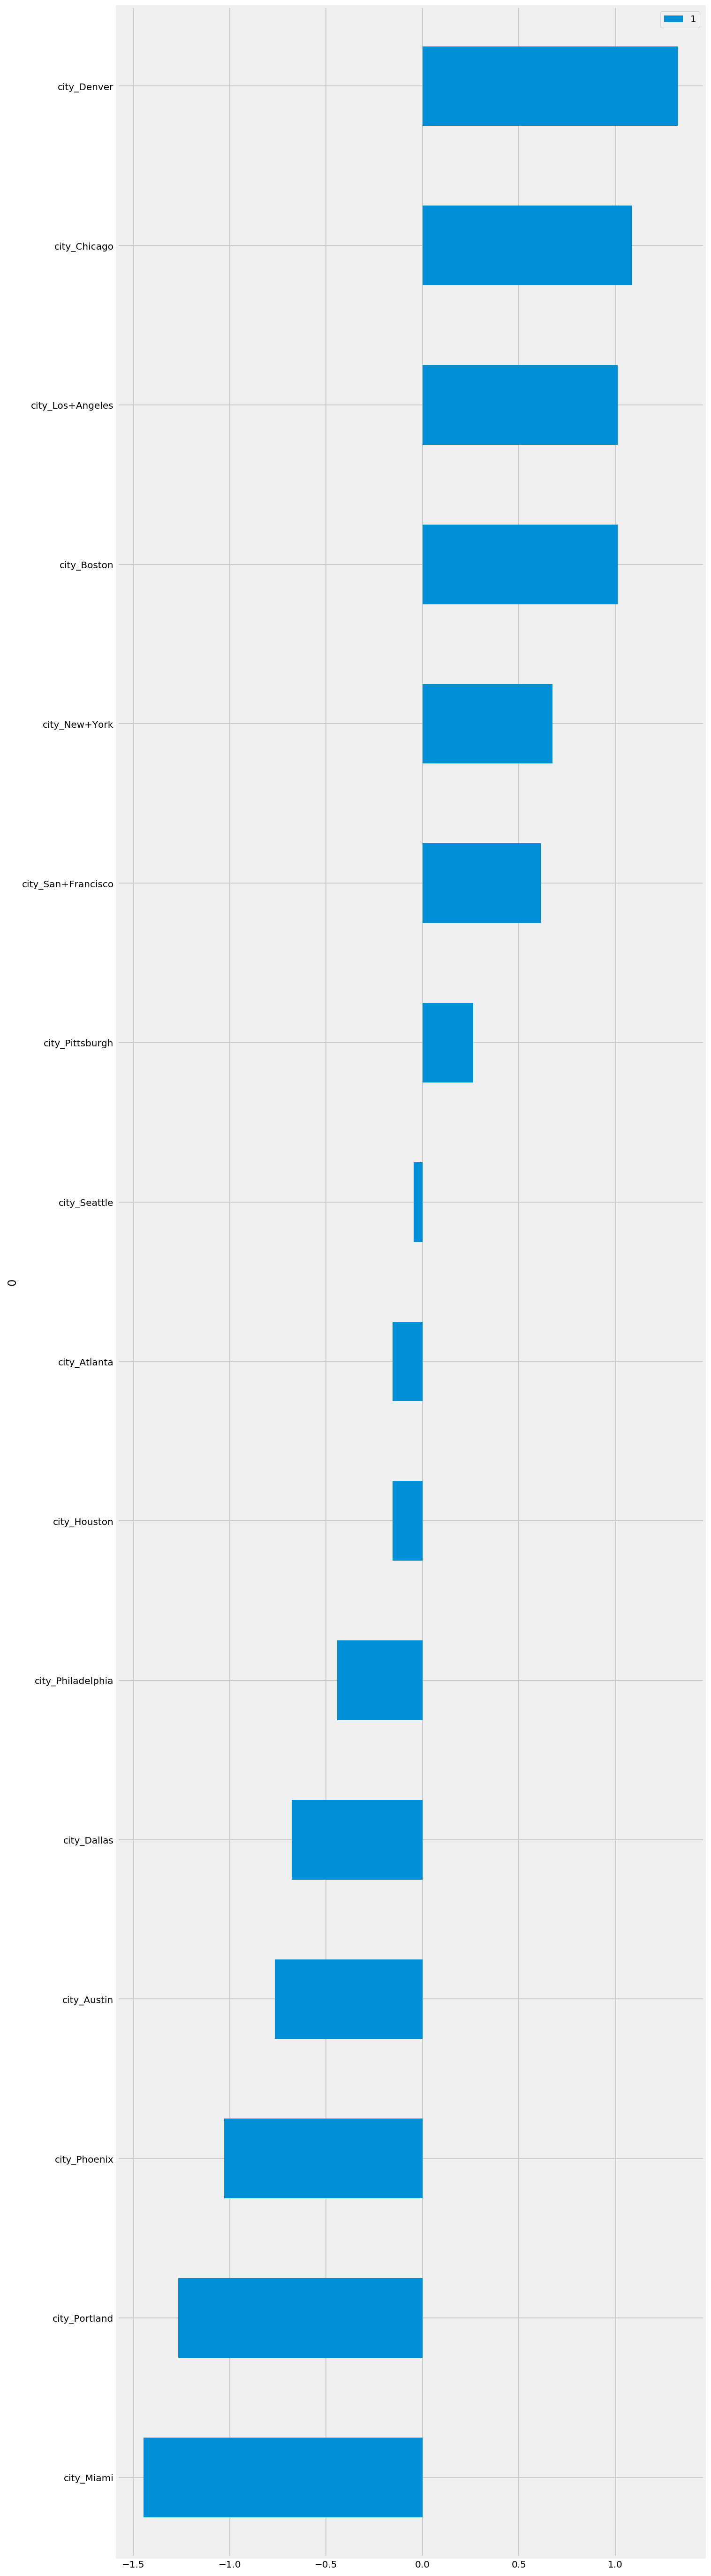

In [453]:
#let's have a look where the highest salaries are by looking at the coefficients

model.fit(X_test, y_test)
pd.DataFrame(list(zip(X_train.columns,list(model.coef_[0])))
            ).set_index(0).sort_values(1
                    ).plot(kind='barh',figsize=(10,50));

In [ ]:
#highest in Denver and least likely to be offered above the median of $104,000 in Miami

In [447]:
#let's look at the same data using a a LogisticRegressionCV model
# choose and inspect the model

model = LogisticRegressionCV()
list(model.get_params().keys())

['Cs',
 'class_weight',
 'cv',
 'dual',
 'fit_intercept',
 'intercept_scaling',
 'max_iter',
 'multi_class',
 'n_jobs',
 'penalty',
 'random_state',
 'refit',
 'scoring',
 'solver',
 'tol',
 'verbose']

In [448]:
# setup the grid search

params = {'penalty':['l1','l2'],
          'Cs': [np.logspace(-4,4,10)],
          'fit_intercept':[True,False],
          'solver':['liblinear']}

gs = GridSearchCV(estimator=model,
                  param_grid=params,
                  cv=5,
                  scoring='accuracy',
                  return_train_score=True)

gs.fit(X_train,y_train)

# extract the grid search results

print('Best Parameters:')
print(gs.best_params_)
print('Best estimator C:')
print(gs.best_estimator_.C_)
print('Best estimator mean cross validated training score:')
print(gs.best_score_)
print('Best estimator score on the full training set:')
print(gs.score(X_train,y_train))
print('Best estimator score on the test set:')
print(gs.score(X_test,y_test))
print('Best estimator coefficients:')
print(gs.best_estimator_.coef_)

Best Parameters:
{'Cs': array([  1.00000000e-04,   7.74263683e-04,   5.99484250e-03,
         4.64158883e-02,   3.59381366e-01,   2.78255940e+00,
         2.15443469e+01,   1.66810054e+02,   1.29154967e+03,
         1.00000000e+04]), 'fit_intercept': True, 'penalty': 'l1', 'solver': 'liblinear'}
Best estimator C:
[ 2.7825594]
Best estimator mean cross validated training score:
0.645502645503
Best estimator score on the full training set:
0.661375661376
Best estimator score on the test set:
0.592592592593
Best estimator coefficients:
[[ 0.66122471 -0.22301455  0.52617753  1.02396394 -0.32584964 -0.24900601
   0.          0.81575949 -1.65625051  0.          1.1598556  -1.18031382
  -1.18031068 -1.65625051  0.96462073 -0.53346043]]


In [ ]:
#Our resultt is very similar with an accuracy of again 59% on our test set

In [ ]:
#let's look at our coefficients with stats model

In [455]:
import statsmodels.discrete.discrete_model as sm
logit = sm.Logit(y, X)
logit.fit().params

         Current function value: 0.611770
         Iterations: 35


/Users/carolinekeddie/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


city_Atlanta           0.182322
city_Austin           -0.980829
city_Boston            1.098612
city_Chicago           0.847298
city_Dallas           -1.386294
city_Denver           -0.200671
city_Houston          -0.336472
city_Los+Angeles       0.693147
city_Miami           -19.473356
city_New+York         -0.154151
city_Philadelphia      0.405465
city_Phoenix         -24.333843
city_Pittsburgh       -1.098612
city_Portland        -23.448628
city_San+Francisco     0.597837
city_Seattle          -0.788457
dtype: float64

In [ ]:
#Finally let's try the same data using KNN nearest neighbours classification model

In [456]:
from sklearn.neighbors import KNeighborsClassifier
# make an instance of a KNeighborsClassifier object with 4 neighbor
knn = KNeighborsClassifier(n_neighbors=4)

# fit on the unstandardized data:
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

In [459]:
# train the model on the training set (using K=4)
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

# test the model on the testing set, and check the accuracy
y_pred_class = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_class))

0.530864197531


In [ ]:
#K=4 was chosen but with such a small sample set changing K by +/- 1 does not change the accuaracy
#our accuracy is no better than baseline and worse than logistic regression

### Summarize your results in an executive summary written for a non-technical audience.
   
- Writeups should be at least 500-1000 words, defining any technical terms, explaining your approach, as well as any risks and limitations.

The null hypothesis is that a high salary could not be predicted by location. Based on our analysis so far the hypothesis can be accepted.

The coefficients of the model do show us that higher salaries exist in places like Boston and Chicago and lower salaries in Portland and Miami. 
The data behaved no better than a bar chart at letting us know how salaries varied with city location.
All the models' accuracy being just above baseline.
However this is possibly due to lack of data. Our data set started out with over 5000 rows of information but the indeed website rarely lists the salaries. In fact from 5375 data sets we were only left with just over 500 that had salaries evident.This was reduced to 270 after essential formatting of the data. This is not enough to form a prediction above baseline.
Equally in order to get more of a handle on what salaries are offered it would be useful to look at the job title in more depth and get more feature variables to describe the jobs in more detail in relation to where they are. For example Portland has alot of start up companies that may initially be paying less up front and more in shares.
A multi label of low, medium, high salaries would be more useful as looking at the distribution of the salaries they are distributed around a median of around $104,000 with a large intequartile range of $135,000- $73375 = $61625. That is there is not really a definitive high and low salary more a steady set of salaries.


### BONUS

Convert your executive summary into a public blog post of at least 500 words, in which you document your approach in a tutorial for other aspiring data scientists. Link to this in your notebook.

In [ ]:
## YOUR LINK HERE IN MARKDOWN FORMAT 